Mô hình hồi quy logistic yêu cầu một số giả định chính. Đây là như sau: -

Mô hình hồi quy logistic yêu cầu biến phụ thuộc về bản chất là nhị phân, đa thức hoặc thứ tự.

Nó đòi hỏi các quan sát phải độc lập với nhau. Vì vậy, các quan sát không nên đến từ các phép đo lặp đi lặp lại.

Thuật toán hồi quy logistic yêu cầu ít hoặc không có đa cộng tuyến giữa các biến độc lập. Điều đó có nghĩa là các biến độc lập không nên có tương quan quá cao với nhau.

Mô hình hồi quy logistic giả định tính tuyến tính của các biến độc lập và tỷ lệ chênh lệch log.

Sự thành công của mô hình hồi quy logistic phụ thuộc vào kích thước mẫu. Thông thường, nó đòi hỏi cỡ mẫu lớn để đạt được độ chính xác cao.

## 1. Import library

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
import time
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

## 2. Prepape data

In [3]:
X = load_breast_cancer()['data']
y = load_breast_cancer()['target']
feature_names = load_breast_cancer()['feature_names']

In [6]:
print(feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


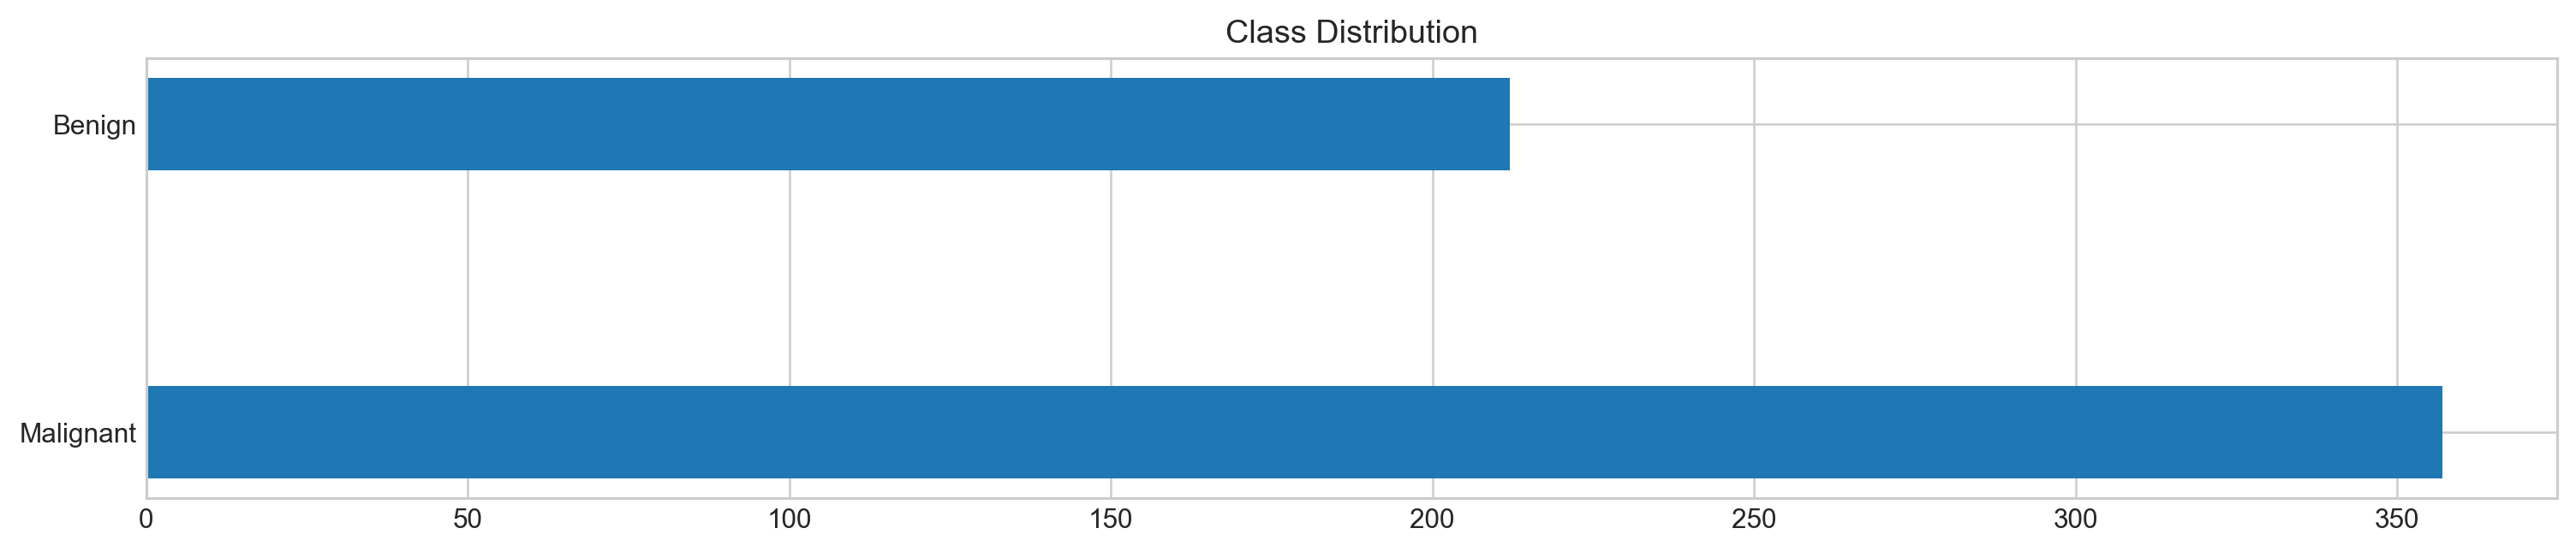

In [10]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.dpi'] = 227
plt.rcParams['figure.figsize'] = (16,3)
plt.barh(['Malignant','Benign'],[sum(y), len(y)-sum(y)], height=0.3)
plt.title('Class Distribution')
plt.show()

In [11]:
pd.DataFrame(np.concatenate((X, y[:, None]), axis=1), columns=np.append(feature_names, 'Target')).head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [12]:
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X)

## 3. Split train/test

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

## 4. Build model

In [17]:
# 1. Xây dựng mô hình
model = LogisticRegression()
# 2. Fit
model.fit(X_train, y_train)
# 3. Độ chính xác
model.score(X_test, y_test)

0.986013986013986

In [18]:
y_pred = model.predict(X_test) 
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1])

## 5. Evaluation

In [20]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
lrm = metrics.confusion_matrix(y_test, y_pred,labels=[0,1])

In [21]:
print(lrm)

[[52  2]
 [ 0 89]]


<AxesSubplot:>

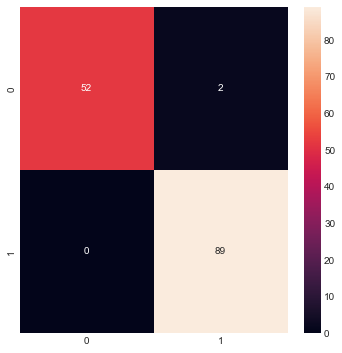

In [25]:
plt.figure(figsize=(6,6))
sns.heatmap(lrm, annot=True)

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        54
           1       0.98      1.00      0.99        89

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.99       143
weighted avg       0.99      0.99      0.99       143

